# **LOJİSTİK REGRESYON ANALİZİ**

Kategorik Değişken bağımlı değişken ile bağımsız değişken arasında ilişkinin araştırılmasında kullanılır.

linear regresyon bağımlı değişkenle bağımsız değişken arasında doğrusal bir ilişki aranır.

lojistik regresyonda ise bağımlı değişken kategorik tiptedir.Sınıflandırma için kullanılır bağımlı değişken kadın erkek şeklinde ise ikili lojistik regresyon analizi yapılır fazla ise çoklu lojistik regresyon analizi yapılır.bağımlı değişken sıralı kategorilerden oluşuyorsa buna da sıralı lojistik regresyon denir.

Nan linear regresyon ise bağımlı değişken iel bağımsız değişkeni arasında polinomsal bir ilişki aranız.bu yönteme polinomsal regresyonda denir.

In [20]:
library(haven)

kanser_veri = read_sav("kanser.sav")

In [21]:
head(kanser_veri)

Hastalık,Sigara,AileÖyküsü,SO2
<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
0,1,1,114
0,1,1,90
0,1,1,135
0,1,0,159
0,1,0,105
0,1,0,79


In [22]:
kanser_veri$Hastalık <- factor(ifelse(kanser_veri$Hastalık == 0, "Evet",
                                      ifelse(kanser_veri$Hastalık == 1, "Hayır",
                                             NA_character_))) # 0 veya 1 olmayan değerleri NA yapar

# Dönüşümü kontrol etmek için sütunun yapısını ve ilk birkaç değerini gösterebiliriz.
str(kanser_veri$Hastalık)
head(kanser_veri$Hastalık)

 Factor w/ 2 levels "Evet","Hayır": 1 1 1 1 1 1 1 1 1 1 ...


[1] Evet Evet Evet Evet Evet Evet
Levels: Evet Hayır

In [23]:
class(kanser_veri$`Hastalık`)

[1] "factor"

In [24]:
summary(kanser_veri$`Hastalık`)

Evet Hayır  NA's 
   50    50     3

In [25]:
#Veriyi ekleyip hastalık sütunumuzu kategorik değişekene dönüştürü o ve 1 evet hayır a dönüştürdük

head(kanser_veri)

Hastalık,Sigara,AileÖyküsü,SO2
<fct>,<dbl+lbl>,<dbl+lbl>,<dbl>
Evet,1,1,114
Evet,1,1,90
Evet,1,1,135
Evet,1,0,159
Evet,1,0,105
Evet,1,0,79


In [26]:
str(kanser_veri)

tibble [103 × 4] (S3: tbl_df/tbl/data.frame)
 $ Hastalık  : Factor w/ 2 levels "Evet","Hayır": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sigara    : dbl+lbl [1:103] 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, ...
   ..@ format.spss: chr "F8.2"
   ..@ labels     : Named num [1:2] 0 1
   .. ..- attr(*, "names")= chr [1:2] "Sigara içmiyor" "Sigara içiyor"
 $ AileÖyküsü: dbl+lbl [1:103] 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
   ..@ label      : chr "Aile Öyküsü"
   ..@ format.spss: chr "F8.2"
   ..@ labels     : Named num [1:2] 0 1
   .. ..- attr(*, "names")= chr [1:2] "Ailede kanser yok" "Ailede kanser var"
 $ SO2       : num [1:103] 114 90 135 159 105 79 86 50 84 35 ...
  ..- attr(*, "label")= chr "Kükürt Dioksit"
  ..- attr(*, "format.spss")= chr "F8.2"


In [27]:
#başka bir yöntemle faktör dönüşümü
kanser_veri$Sigara = as.factor(kanser_veri$Sigara)

In [28]:
str(kanser_veri)

tibble [103 × 4] (S3: tbl_df/tbl/data.frame)
 $ Hastalık  : Factor w/ 2 levels "Evet","Hayır": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sigara    : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ AileÖyküsü: dbl+lbl [1:103] 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...
   ..@ label      : chr "Aile Öyküsü"
   ..@ format.spss: chr "F8.2"
   ..@ labels     : Named num [1:2] 0 1
   .. ..- attr(*, "names")= chr [1:2] "Ailede kanser yok" "Ailede kanser var"
 $ SO2       : num [1:103] 114 90 135 159 105 79 86 50 84 35 ...
  ..- attr(*, "label")= chr "Kükürt Dioksit"
  ..- attr(*, "format.spss")= chr "F8.2"


In [29]:
#Boş değer var mı kontrolü
sapply(kanser_veri, function(x) sum(is.na(x)))

Hastalık     Sigara AileÖyküsü        SO2 
         3          3          3          3

In [31]:
#Boş değer var mı Amelia paketi ile kontrol etmek
install.packages("Amelia")
library(Amelia)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppArmadillo’


Loading required package: Rcpp

## 
## Amelia II: Multiple Imputation
## (Version 1.8.3, built: 2024-11-07)
## Copyright (C) 2005-2026 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 



Warning message:
“Unknown or uninitialised column: `arguments`.”
Warning message:
“Unknown or uninitialised column: `arguments`.”
Warning message:
“Unknown or uninitialised column: `imputations`.”


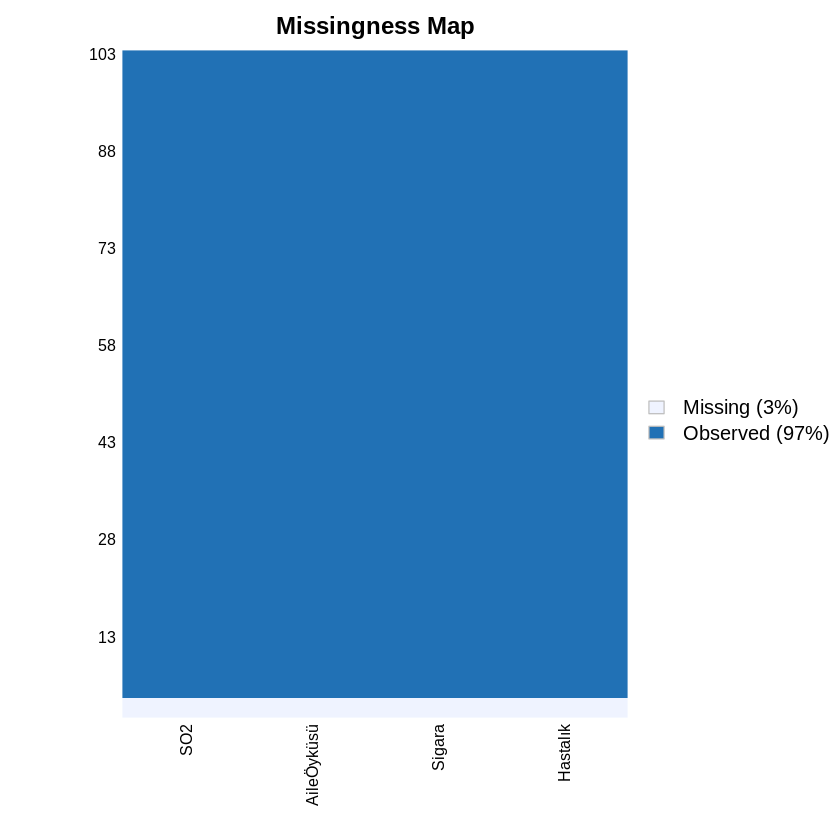

In [32]:
#grafikte nerde eksik veri var görebiliyoruz.
missmap(kanser_veri)

In [34]:
#satır sayısı
nrow(kanser_veri)

[1] 103

In [36]:
#Veri sayısındaki eksik verileri kaldırmak için
kanser_veri=kanser_veri[!(is.na(kanser_veri$`Hastalık`)| is.na(kanser_veri$SO2)),]

In [37]:
nrow(kanser_veri)

[1] 100

Warning message:
“Unknown or uninitialised column: `arguments`.”
Warning message:
“Unknown or uninitialised column: `arguments`.”
Warning message:
“Unknown or uninitialised column: `imputations`.”


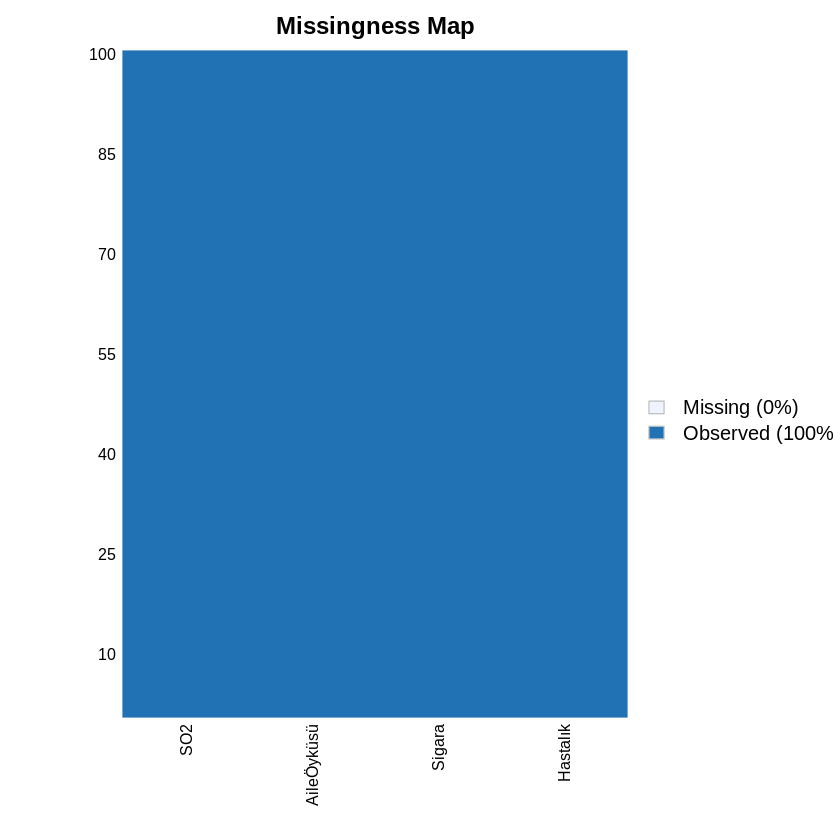

In [38]:
#eksik veriler kaldırıldı.
missmap(kanser_veri)

In [39]:
#ikili tablo yazdırmak için

xtabs(~Hastalık+Sigara, data = kanser_veri)

        Sigara
Hastalık  0  1
   Evet  35 15
   Hayır 25 25

In [41]:
install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



In [51]:
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [56]:
#bu işlemlerin ne olduğunu ne anlama geldiğini 16. derste yapmıştık ordan yardım alabiliriz. orda gayet güzel not ttum.
#library(caret)

#set.seed(100)

#egitim_indis= createDataPartition(y=kanser_veri$Sigara,p= 0.80, list=F)

#egitim_veri =kanser_veri[egitim_indis,]
#test_veri = -kanser_veri[-egitim_indis,]

#nrow(egitim_veri)
#nrow(test_veri)

#lr_olasılık = predict(lr_modeli newdata= test_veri,type="response")

#head(lr_olasılık) modellere göre olasılık hesaplamak için

#lr_tahmin = ifelse(lr_olasılık>0.5,"sagliksiz","sağlıklı")

#head(lr_tahmin)

#mean(lr_tahmin==test_veri$kh) tahminle veri ne kadar uyumlu hesaplamak için



In [ ]:
#lojistik regresyon için glm fonksiyonu kullanılır
#lr_model =glm(veri~.,data= egitim_veri,family=binomial)

#summary(lr_model)

#p değeri 0.05 ten küçük olan değerler anlamlıdır.
#